### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Assignment activity 1: Make predictions with regression

**Scenario:**<br>
Turtle Games sources and sells Lego products across various countries. They want your help with determining the optimal price of products that would **achieve maximum sales results**.

*Sales = Price x Quantity*

**Business Questions:**<br>
1. What price should be set for the Lego sets with 8000 Lego pieces? (Simple regression)
2. What price should be set fro the Lego sets with 8000 Lego pieces that are most likely to purchased by 30-year-old customers? (Multiple linear regression)

### Part 1: Prepare the workstation

In [1]:
# import all necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
# import the data set
lego = pd.read_csv('lego.csv')

# view the DataFrame
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [3]:
# check the metadata
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


1. There are 12,261 rows with 7 columns of data. 
2. It shows no null values (Non-Null) in the DataFrame.
3. All data are numeric. Prices and ratings are float data type.
4. Ratings with a decimal place instead of whole numbers.

In [4]:
# double check if no missing values
print(lego.isnull().sum())

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64


### Part 2: Descriptive statistics and overview of the data set by visualisation

In [5]:
# print descriptive statistics to get an overview
# check any outliers or anomalies
lego.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


**Brief understanding or overview of the LEGO data set:**
- The Lego sets are with age range from 0 to 30 with an average 16.7
- Prices range from 2.27 to 1,104.87 with an average 65.14 (in USD)
- Number of reviews range from 0 to 367 with 75% of products got 11 or less reviews. --> **some produces are more popular**
- Number of Lego pieces range from 1 to 7,541 with median of 216 --> **half of the Lego products are relative easy!**
- Player star rating range from 0 to 5 with median of 4.4 --> **the ratings are high!**
- Review difficulty range from 0 to 5 and with median and mean of 2 --> **relatively easy**<br>
- Products are sold in 10 countries in average, with a max of 20!<br>
     (There are some products not selling in any countries.)

**Some thoughts/ justifications noted:**
- No checkiing for duplicates? No product ID
- Why some prices are numbers with 4 decimal places? Maybe prices are in different currencies and coverted by exchange rates.

Codes from<br>
[Plotting categorical variables](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py)<br>
[The histogram (hist) function with multiple data sets](https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html)<br>
[Instantly Beautify Matplotlib Plots by Viewing all Available Styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles)

Text(0.5, 1.0, 'Number of countries sold')

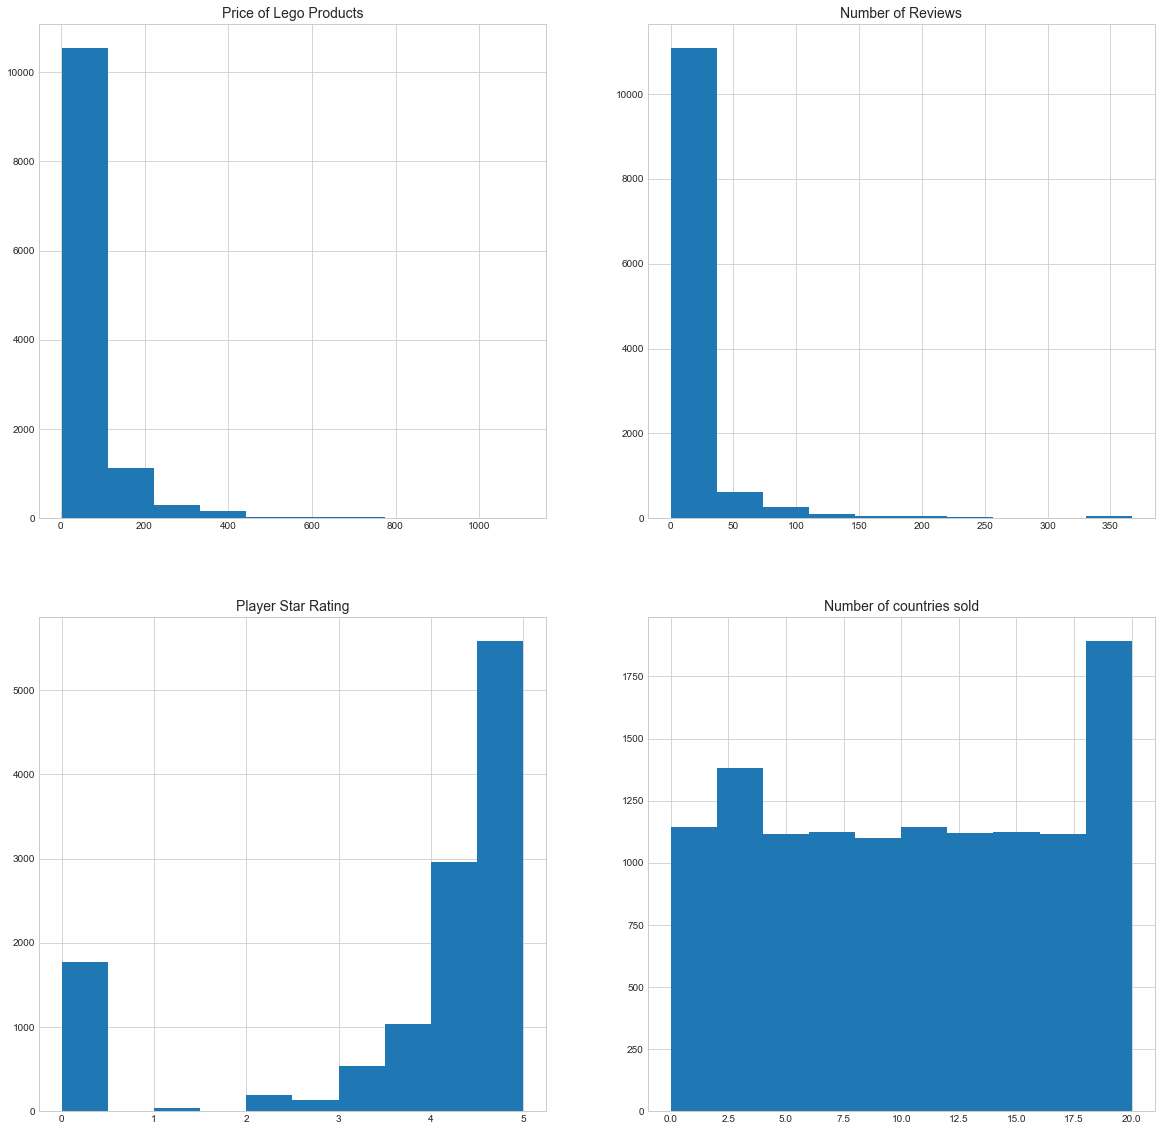

In [6]:
# an overview of the distribution of some variables

# specify the style in seaborn
plt.style.use('seaborn-whitegrid')

# divide the plot into 4 subplots with assigned object names
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(20, 20)) 

# subplot 1 (top left): the distribution of Lego price
ax0.hist(lego.list_price)
ax0.set_title('Price of Lego Products', fontsize=14)

# subplot 2 (top right): the distribution of number of reviews
ax1.hist(lego.num_reviews)
ax1.set_title('Number of Reviews', fontsize=14)

# subplot 3 (bottom left): the distribution of player ratings
ax2.hist(lego.play_star_rating)
ax2.set_title('Player Star Rating', fontsize=14)

# subplot 4 (bottom right): the distribution of number of countries sold
ax3.hist(lego.country)
ax3.set_title('Number of countries sold', fontsize=14)

**Note: These variables are not normally distributed.**

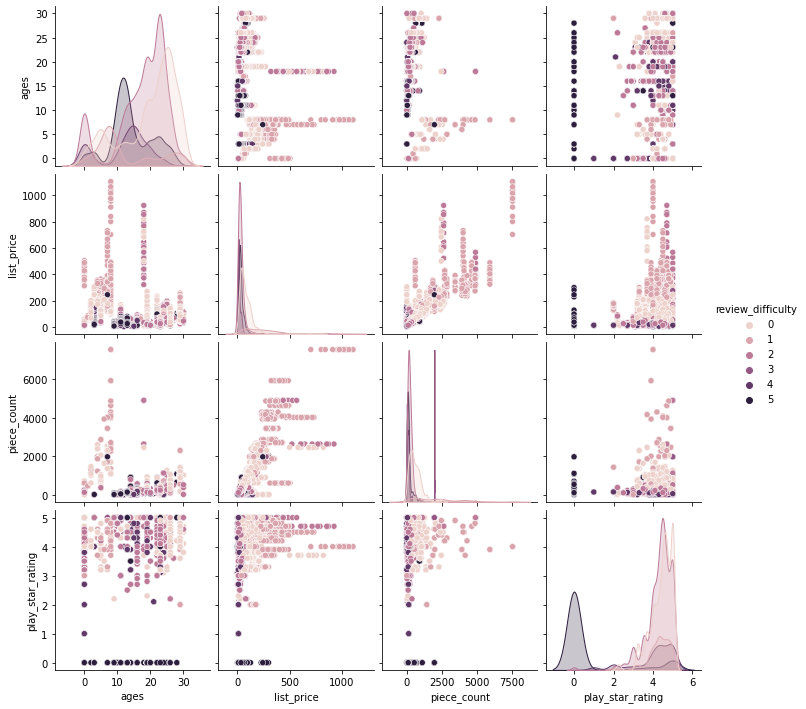

In [9]:
# check for any special correlations between variables

# copy a new data frame which drops the columns "country" and "number of reviews"
# those columns are with too many data points that the plot will be too messy
lego_pairplot = lego.drop(['country', 'num_reviews'], axis=1).copy()

# plot the pair plot
sns.pairplot(lego_pairplot, hue='review_difficulty')

#### The Lego sets with player rating 0 are also rated 5 in difficulty. This may be the part we should deal with in order to incease customer satisfaction and sales potential. So this would worth to make further analysis.

Text(0.5, 0, 'Age')

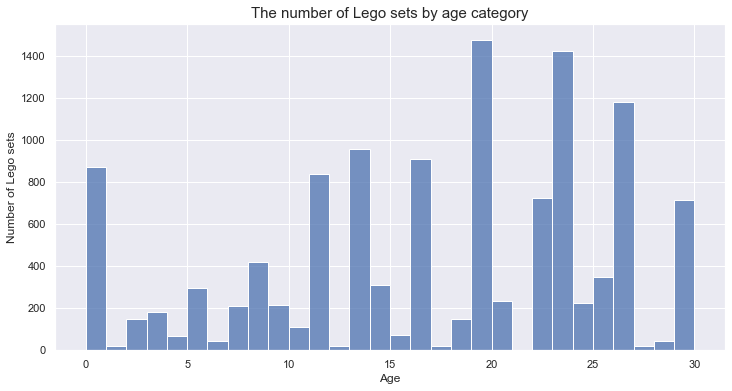

In [7]:
# set the size and theme of figure
sns.set_theme()
plt.subplots(figsize=(12,6))

# create the histogram for distribution of ages
ax = sns.histplot(data=lego, x='ages', binwidth=1)

# reset the information of the graph
ax.set_title('The number of Lego sets by age category', fontsize=15)
ax.set_ylabel('Number of Lego sets', fontsize=12)
ax.set_xlabel('Age', fontsize=12)

Text(0.5, 0, 'Number of Lego pieces in the product')

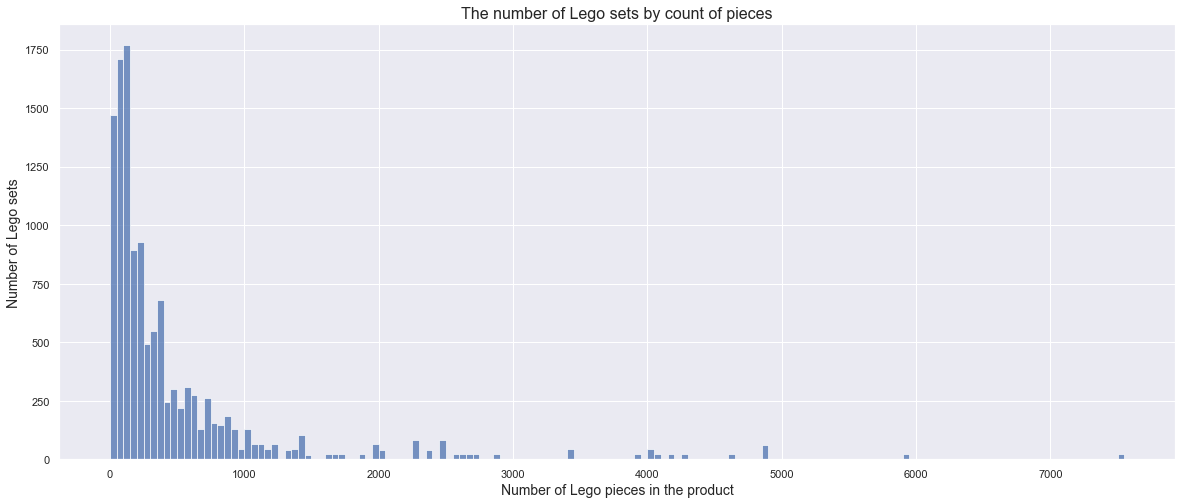

In [8]:
# set the size of graph
plt.subplots(figsize=(20,8))

# create the histogram for distribution of Lego pieces
ax = sns.histplot(data=lego, x='piece_count', binwidth=50)

# reset the information of the graph
ax.set_title('The number of Lego sets by count of pieces', fontsize=16)
ax.set_ylabel('Number of Lego sets', fontsize=14)
ax.set_xlabel('Number of Lego pieces in the product', fontsize=14)

Text(0.5, 0, 'Listed price')

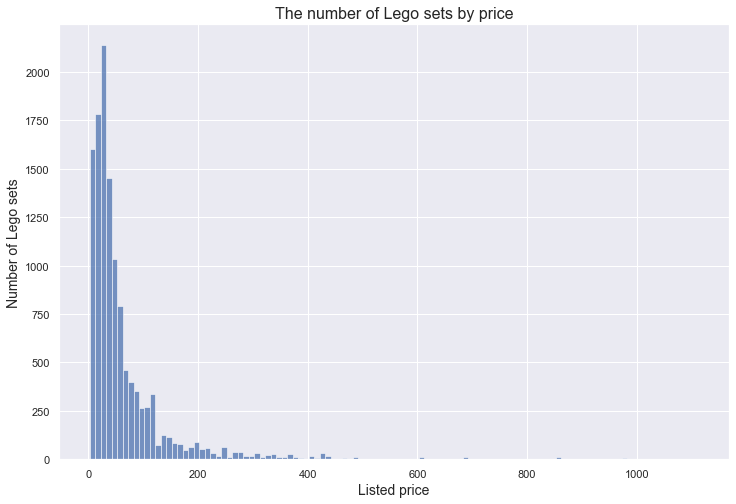

In [9]:
# set the size of graph
plt.subplots(figsize=(12,8))

# create the histogram for distribution of price
ax = sns.histplot(data=lego, x='list_price', binwidth=10)

# reset the information of the graph
ax.set_title('The number of Lego sets by price', fontsize=16)
ax.set_ylabel('Number of Lego sets', fontsize=14)
ax.set_xlabel('Listed price', fontsize=14)

Text(0.5, 0, 'Age category')

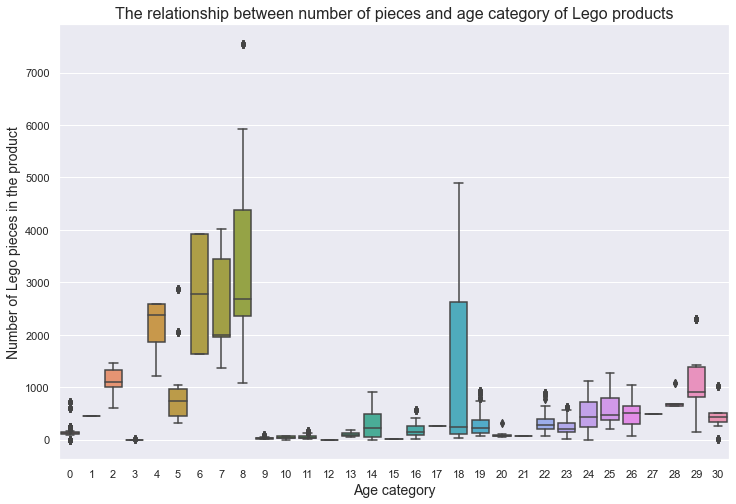

In [10]:
# set the size of graph
plt.subplots(figsize=(12,8))

# create a box plot with variables to be examined
ax = sns.boxplot(data=lego, x='ages', y='piece_count')

# reset the information of the graph
ax.set_title('The relationship between number of pieces and age category of Lego products', fontsize=16)
ax.set_ylabel('Number of Lego pieces in the product', fontsize=14)
ax.set_xlabel('Age category', fontsize=14)

#### Note the points from the plots
- Age 8 and age 18 got the greatest variety of choices. 
- Age 9 to 13 got a relatively less pieces in the products.
- Age 6 to 8 got a relatively more pieces.
- It is interesting that the product with the greatest number of Lego pieces is for aged 8!
- Price and piece counts are not normally distributed but highly skewed to the right. 
   --> This means **an imbalance of data**!

In [11]:
# subset of the data set with piece count over 4000
lego_over_4000 = lego[lego['piece_count']>=4000]

# check the subset
lego_over_4000.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
165,8,369.99,43,5923,3.9,1,20
168,8,279.99,99,4002,4.7,1,20
169,8,249.99,64,4163,3.7,1,20
170,8,239.99,228,4295,4.2,1,20
248,8,349.99,171,4080,4.5,1,20


Text(0.5, 0, 'Number of Lego pieces in the product')

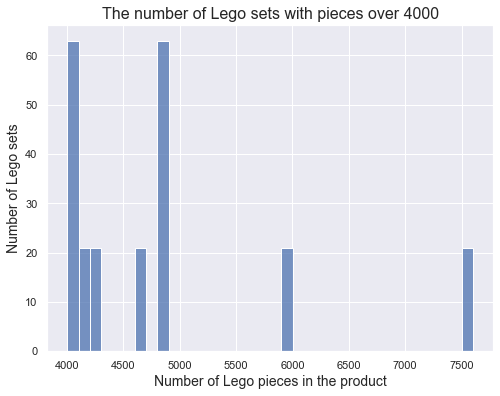

In [12]:
# set the size of the plot
plt.subplots(figsize=(8,6))

# create the histogram for distribution of Lego >4000 pieces
ax = sns.histplot(data=lego_over_4000, x='piece_count', binwidth=100)

# reset the information of the graph
ax.set_title('The number of Lego sets with pieces over 4000', fontsize=16)
ax.set_ylabel('Number of Lego sets', fontsize=14)
ax.set_xlabel('Number of Lego pieces in the product', fontsize=14)

Text(0.5, 0, 'Age category')

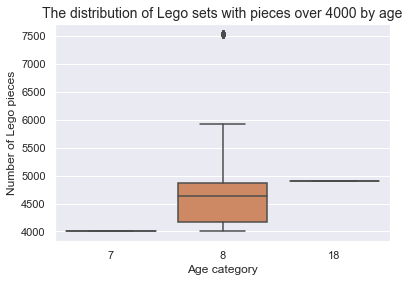

In [14]:
# create a boxplot to show the distrubution of ages given Lego >4000 pieces
ax = sns.boxplot(data=lego_over_4000, x='ages', y='piece_count')

# reset the information of the graph
ax.set_title('The distribution of Lego sets with pieces over 4000 by age', fontsize=14)
ax.set_ylabel('Number of Lego pieces', fontsize=12)
ax.set_xlabel('Age category', fontsize=12)

Text(0.5, 0, 'Listed price')

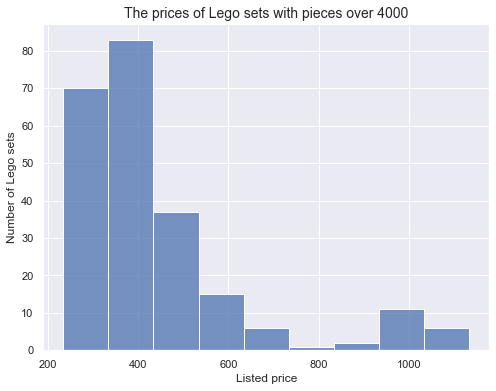

In [15]:
# set the size of the plot
plt.subplots(figsize=(8,6))

# create the histogram to show the distrubution of prices given Lego >4000 pieces
ax = sns.histplot(data=lego_over_4000, x='list_price', binwidth=100)

# reset the information of the graph
ax.set_title('The prices of Lego sets with pieces over 4000', fontsize=14)
ax.set_ylabel('Number of Lego sets', fontsize=12)
ax.set_xlabel('Listed price', fontsize=12)

### Part 3: Apply simple linear regression by splitting training and test sets
**(one independent variable)**

#### Question of the train-test split
- Why do we need to create train and test data?
- How does this improve our results?

With sufficiently large data set, splitting the data into the train and test subsets helps evaluate the performance of the model. Such evaluation is easy and fast to implement as well as not costly in terms of time and money. As the training set and the test set are from the same data set, the test set data are the best cases to test the model. It can avoid bias, like noises or effects of other factors which are not captured in this model. It would be more complicated in order to hold other things equal. Also, the isolation of test set from the training set avoid bias in the form of repeating itself.

In [22]:
# remove irrelevant columns
lego_df1 = lego.drop(['ages', 'num_reviews', 
                      'play_star_rating',
                      'review_difficulty',
                      'country'], axis = 1)

# print the new DataFrame
lego_df1.head()

,list_price,piece_count
0,29.99,277
1,19.99,168
2,12.99,74
3,99.99,1032
4,79.99,744


In [23]:
# check the shape of the new DataFrame
lego_df1.describe()

,list_price,piece_count
count,12261.000000,12261.000000
mean,65.141998,493.405921
std,91.980429,825.364580
min,2.272400,1.000000
25%,19.990000,97.000000
50%,36.587800,216.000000
75%,70.192200,544.000000
max,1104.870000,7541.000000


In [24]:
# define the dependent(y) and independent(x) variables
y = lego_df1['list_price']

x = lego_df1['piece_count'].values.reshape(-1, 1)

In [25]:
# create the subset (train 70%/ test 30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.7,
                                                    random_state=22)

In [26]:
# print the shape of all the train and test sets:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8582, 1)
(3679, 1)
(8582,)
(3679,)


[Linear Regression Example with train test split](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [27]:
lm = LinearRegression()

# fit the linear regression model with training set
lm.fit(x_train, y_train)

LinearRegression()

In [28]:
# predict the training set values
y_pred = lm.predict(x_test)

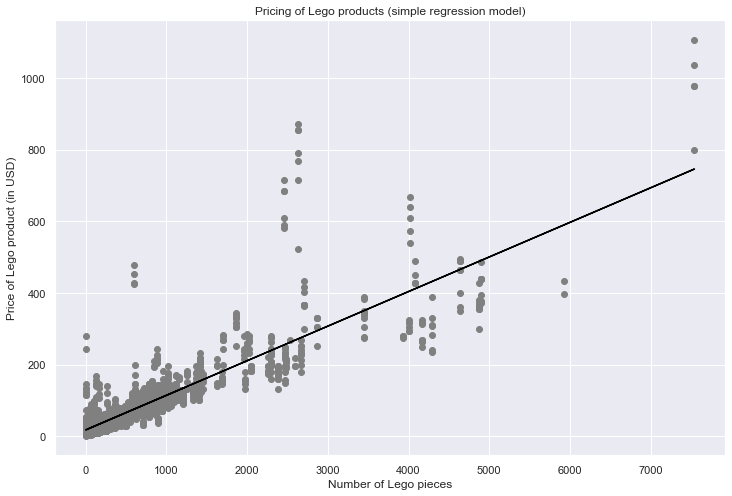

In [29]:
# set the size of the figure
plt.subplots(figsize=(12,8))

# plot the data points and regression line
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='black')

# set the title and axis labels for the graph
plt.title("Pricing of Lego products (simple regression model)")
plt.xlabel("Number of Lego pieces")
plt.ylabel("Price of Lego product (in USD)")

# print the graph
plt.show()

In [33]:
# print the R-squared value of the test data
score_test = lm.score(x_test, y_test)
print("Score of test set:", score_test)
print("Accuracy of test set:" + str(score_test*100) + '%')

Score of test set: 0.7760181525105212
Accuracy of test set:77.60181525105212%


In [34]:
# print the MAE and MSE of the model
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

Mean Absolute Error: 19.868834469540626
Mean Square Error: 1789.6026543980838


In [35]:
# Print the intercept and coefficient values

c = lm.intercept_
m = lm.coef_

for i in range(len(m)):
    m= m[i]

print("Intercept value:", c)
print("Coefficient value:", m)

Intercept value: 17.830154039784865
Coefficient value: 0.09649985677759224


In [36]:
# define the calculation of the product price
# pricing of Lego product based on number of pieces
def pricing_of_lego(x):

    c = lm.intercept_
    m = lm.coef_

    for i in range(len(m)):
        m= m[i]

    y = m*x + c
    
    print(f'The maximum number of Lego pieces is {x}.')
    print(f'The price of the Lego product is US${y:,.2f}.')

pricing_of_lego(lego['piece_count'].max())

The maximum number of Lego pieces is 7541.
The price of the Lego product is US$745.54.


In [37]:
# answering the business question
# the given number of Lego pieces is 8000
pricing_of_lego(8000)

The maximum number of Lego pieces is 8000.
The price of the Lego product is US$789.83.


### Part 4: Apply multiple linear regression by splitting training and test sets
**(two independent variables)**

In [38]:
# create a new DataFrame with necessary columns
lego_df2 = lego.drop(['num_reviews', 
                      'play_star_rating',
                      'review_difficulty',
                      'country'], axis = 1)

# print the new DataFrame
lego_df2.head()

,ages,list_price,piece_count
0,19,29.99,277
1,19,19.99,168
2,19,12.99,74
3,5,99.99,1032
4,5,79.99,744


In [39]:
# check the DataFrame
lego_df2.describe()

,ages,list_price,piece_count
count,12261.00000,12261.000000,12261.000000
mean,16.68828,65.141998,493.405921
std,8.21868,91.980429,825.364580
min,0.00000,2.272400,1.000000
25%,11.00000,19.990000,97.000000
50%,19.00000,36.587800,216.000000
75%,23.00000,70.192200,544.000000
max,30.00000,1104.870000,7541.000000


In [40]:
# define the dependent variable(y)
y = lego_df2['list_price']

# define the set of independent variables(X)
X = lego_df2[['ages', 'piece_count']]

In [41]:
# split the data in train (70%) and test (30%) sets
X_train, X_test, Y_train, Y_test = \
sklearn.model_selection.train_test_split(X, y, 
                                         test_size = 0.3, 
                                         random_state = 32)

In [42]:
# print the shape of all the train and test sets:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8582, 2)
(3679, 2)
(8582,)
(3679,)


In [43]:
# train the model using the statsmodel OSL library
# add_constant() treat the intercept value 16.795 \
# as an additional variable of 1
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# set the predicted response vector
Y_pred = model.predict(sm.add_constant(X_test))

# call a summary of the model
print_model = model.summary()

# print the summary
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 1.368e+04
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:49:17   Log-Likelihood:                -44688.
No. Observations:                8582   AIC:                         8.938e+04
Df Residuals:                    8579   BIC:                         8.940e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.1338      1.149     14.912      

C:\Users\Miffy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
mlr = LinearRegression()

# fit the model
mlr.fit(X_test, Y_test)

# call the predictions
y_pred_mlr = mlr.predict(X_test)

print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 31.41564679  39.04293292  43.26505912 ... 243.31714276  72.10196825
  35.62501547]


In [45]:
# print the R-squared of the test set
print(mlr.score(X_test, Y_test)*100)

74.61953706880526


In [46]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)

print('R squared: {:.2f}'.format(mlr.score(X_test, Y_test)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 74.62
Mean Absolute Error: 66.06701951671997
Mean Square Error: 14817.353929191577


In [47]:
# print the coefficients
print(model.params)

const          17.133849
ages            0.023060
piece_count     0.096065
dtype: float64


In [48]:
# set the new values for prediction
New_ages = 30
New_piece_count = 8000

# fit the new values to the MLR model
print ('Predicted Value: \n', mlr.predict([[New_ages, New_piece_count]])) 

Predicted Value: 
 [808.99411429]


C:\Users\Miffy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Validation of the model

**Comparing the optimal prices for Lego with 8000 pieces:**<br>
from SLR: USD 789.83<br>
from MLR: USD 808.99<br>

**Comparing the R-squared values of test data:**<br>
from SLR: 77.60% <br>
from MLR: 74.62% <br>

**Comparing the MAE and MSE:**<br>
From SLR:<br>
Mean Absolute Error: 19.868834469540626<br>
Mean Square Error: 1789.6026543980838<br>
From MLR:<br>
Mean Absolute Error: 66.06701951671997<br>
Mean Square Error: 14817.353929191577<br>

**Relatively speaking, the simple linear regression model has greater explanatory power with a higher R-squared value and lower errors.**

### Limitations
1. Both optimal prices are a lot lower than the listed price for similar products with great number of Lego pieces. As we can see, the R-squared values are lower than 80%. There are also a lot of factors not taken into account, like costs of storage, shipping and promotions.


2. The Lego sets with pieces count over 4000 is a minority set of data. The analysis can be improved by applying the imblearn libarary which handles unbalanced data, and the SMOTE library which creates new samples from existing data. Since Lego products are highly standardised, another way to solve this could be doing survey and collecting data from similar Lego products in the market.

## ----------------------  End of Assignment Activity 1  ----------------------

## Assignment activity 2: Make predictions with clustering

**Scenario**
Turtle Games wants to determine **which segments** to group their products into so that they can tailor their marketing efforts optimally **based on the product category**. 

**Objective**
1. Determine the optimal number of product segments that can then be used to lay the foundations for further analysis.
2. How many product segments (clusters) should be utilised in sales and marketing strategies, and what is the justification for the number of segments?

In [8]:
# check if any unique identifiers
lego.describe(include='all')

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


In [10]:
# check if all columns are numeric instead of objects
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


### Normalise the data set

In [58]:
# import the MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler 

# copy the lego DataFrame for nomalization
X = lego
y = lego['review_difficulty']

# create a list with the column labels for the new DataFrame
x_cols = lego.columns

# create the object from MinMaxScaler
ms = MinMaxScaler() 
# modify X to scale values between 0 and 1
X = ms.fit_transform(X) 
# set X as equal to a new DataFrame
X = pd.DataFrame(X, columns=[x_cols]) 

# check the results of the modified DataFrame
X.head() 

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,0.633333,0.025138,0.005450,0.036605,0.80,0.0,1.0
1,0.633333,0.016069,0.005450,0.022149,0.80,0.4,1.0
2,0.633333,0.009720,0.029973,0.009682,0.86,0.4,1.0
3,0.166667,0.088625,0.062670,0.136737,0.72,0.0,1.0
4,0.166667,0.070486,0.038147,0.098541,0.64,0.2,1.0


### Apply the clustering algorithm

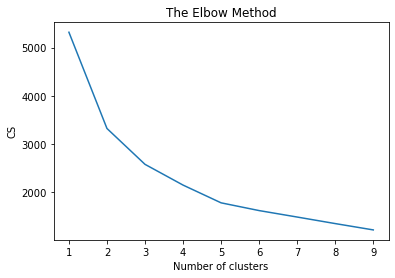

In [59]:
# import the KMeans class
from sklearn.cluster import KMeans 

# elbow chart for us to decide on the number of optimal clusters
# create an empty list (cs) to store the different cluster sizes
# set the k-means parameters
# fit the k-means funtion with the data set X
# calculate the inertia values of different k-means by loops
# add the inertia values to the list (cs) using .append() function
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [60]:
#for test purpose can evaluate with n=1
kmeans = KMeans(n_clusters=1, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3765 out of 12261 samples were correctly labeled.
Accuracy score: 0.31


In [61]:
#for test purpose can evaluate with n=2
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3765 out of 12261 samples were correctly labeled.
Accuracy score: 0.31


In [71]:
#for test purpose can evaluate with n=3
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3974 out of 12261 samples were correctly labeled.
Accuracy score: 0.32


In [63]:
#for test purpose can evaluate with n=4
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2172 out of 12261 samples were correctly labeled.
Accuracy score: 0.18


In [64]:
#for test purpose can evaluate with n=5
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1896 out of 12261 samples were correctly labeled.
Accuracy score: 0.15


In [65]:
#for test purpose can evaluate with n=6
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 2806 out of 12261 samples were correctly labeled.
Accuracy score: 0.23


### Visualise the clusters

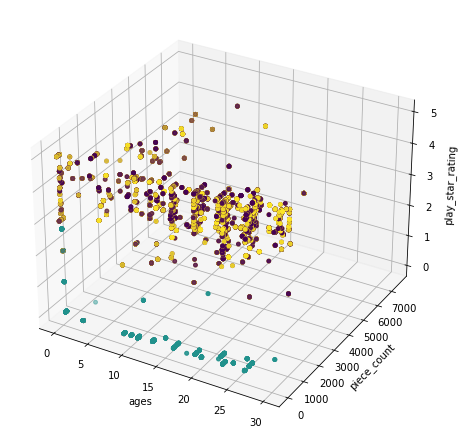

In [73]:
# compare age, piece count
fig = plt.figure(figsize=(26, 26))
ax = fig.add_subplot(131, projection='3d')

ax.scatter(lego['ages'], lego['piece_count'], lego['play_star_rating'], c=labels, s=15)
ax.set_xlabel('ages')
ax.set_ylabel('piece_count')
ax.set_zlabel('play_star_rating')
plt.show()

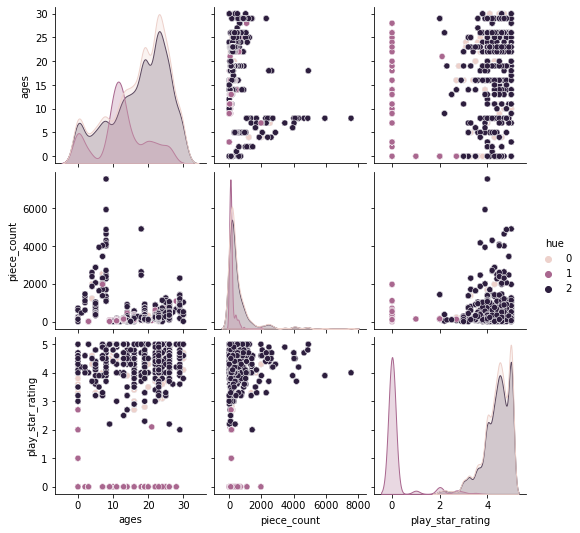

In [76]:
# Plot the variables you think may be important against each other
var = ['ages', 'piece_count', 'play_star_rating']
lego['hue'] = labels

# Plot using seaborn
sns.pairplot(lego, vars=var, hue='hue')

4. Determine the optimal number of clusters into which the data can be categorised leveraging an elbow chart.
    - What can you interpret from the elbow chart?
    - What does it tell you about product segments (clusters) that should be utilised in sales and marketing strategies? 

By trial and error, setting y variable as "review difficulty" and with 3 clusters got the highest accuracy score (0.32, i.e. 32% of the samples are labelled correctly). There is a clear group which is the products rate the most difficult (review difficulty = 5) while the other two groups are not with clear cut. The most difficult products are rated the lowest by the players. This kind of products are spread through all ages.

**This particular group of products worth further investigation.**